In [1]:
import sys
import os
import numpy as np

#Add the 'oracle' directory to the Python path
sys.path.append(os.path.join(os.getcwd(), 'oracle'))
import oracle


res = oracle.q1_fish_train_test_data(23607)
attributes = res[0]
train_img = res[1]
train_labels = res[2]
test_img = res[3]
test_labels = res[4]
train_img = np.array(train_img)
train_labels = np.array(train_labels)
test_img = np.array(test_img)
test_labels = np.array(test_labels)
print(attributes)
print(train_img.shape)
print(train_labels.shape)
print(test_img.shape)
print(test_labels.shape)

('Wearing_Lipstick', 'Big_Lips')
(20000, 3, 32, 32)
(20000,)
(1000, 3, 32, 32)
(1000,)


In [2]:
def mean_covariance_estimate(n,class_num):
    all_vec = []
    c = 0
    for i in range(len(train_img)):
        if c < n:
            if train_labels[i] == class_num:
                c+=1
                data_vec = []
                for j in [0,1,2]:
                    for k in range(32): 
                        for l in range(32):
                            data_vec.append(train_img[i][j][k][l])
                data_vec = np.array(data_vec)
                all_vec.append(data_vec)
        else:
            break
    print(len(all_vec))
    all_vec = np.array(all_vec)
    mean = np.mean(all_vec, axis=0)
    covariance = np.cov(all_vec, rowvar=False)
    return mean,covariance

In [3]:
def class_conditional(class_num):
    n = [50,100,500, 1000, 2000, 4000]
    mean_norm = []
    covariance_norm = []
    for i in n : 
        datas = mean_covariance_estimate(i, class_num)
        print(datas[1].shape)
        mean_norm.append(np.linalg.norm(datas[0],ord = 2))
        covariance_norm.append(np.linalg.norm(datas[1],ord = 'fro'))
    return mean_norm,covariance_norm
class_conditional(0)

50
(3072, 3072)
100
(3072, 3072)
500
(3072, 3072)
1000
(3072, 3072)
2000
(3072, 3072)
4000
(3072, 3072)


([np.float32(24.372547),
  np.float32(25.335903),
  np.float32(24.884106),
  np.float32(24.411089),
  np.float32(24.372675),
  np.float32(24.389668)],
 [np.float64(79.27066845453884),
  np.float64(88.4562473542602),
  np.float64(87.78140748540866),
  np.float64(91.19053644012945),
  np.float64(92.46386055961537),
  np.float64(94.37376823620782)])

50
(3072, 3072)
100
(3072, 3072)
500
(3072, 3072)
1000
(3072, 3072)
2000
(3072, 3072)
4000
(3072, 3072)
[np.float32(24.372547), np.float32(25.335903), np.float32(24.884106), np.float32(24.411089), np.float32(24.372675), np.float32(24.389668)] [np.float64(79.27066845453884), np.float64(88.4562473542602), np.float64(87.78140748540866), np.float64(91.19053644012945), np.float64(92.46386055961537), np.float64(94.37376823620782)]


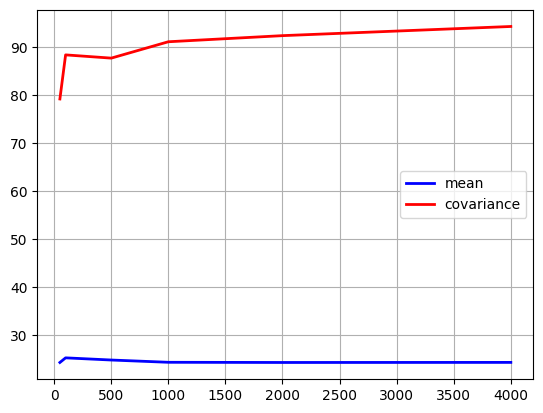

In [4]:
import matplotlib.pyplot as plt
x = [50,100,500, 1000, 2000, 4000]
mean_0,covariance_0 = class_conditional(0)
print(mean_0,covariance_0)
plt.plot(x,mean_0 , label='mean', color='b', linestyle='-', linewidth=2)
plt.plot(x,covariance_0 , label='covariance', color='r', linestyle='-', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

50
(3072, 3072)
100
(3072, 3072)
500
(3072, 3072)
1000
(3072, 3072)
2000
(3072, 3072)
4000
(3072, 3072)
[np.float32(24.416117), np.float32(24.590708), np.float32(23.936064), np.float32(23.936852), np.float32(24.079899), np.float32(24.11139)] [np.float64(128.0327709223098), np.float64(105.28861842168915), np.float64(98.73989592944926), np.float64(103.97383335826255), np.float64(105.11630071180905), np.float64(105.07357912721496)]


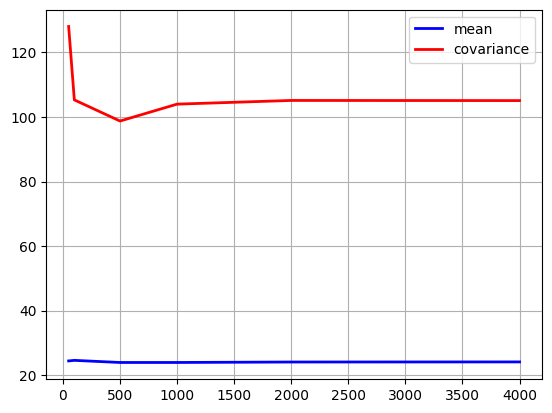

In [5]:
mean_1,covariance_1 = class_conditional(1)
print(mean_1,covariance_1)
plt.plot(x,mean_1 , label='mean', color='b', linestyle='-', linewidth=2)
plt.plot(x,covariance_1 , label='covariance', color='r', linestyle='-', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()




50
(3072, 3072)
100
(3072, 3072)
500
(3072, 3072)
1000
(3072, 3072)
2000
(3072, 3072)
4000
(3072, 3072)
[np.float32(26.003605), np.float32(26.203138), np.float32(25.32776), np.float32(25.602652), np.float32(25.64935), np.float32(25.800201)] [np.float64(92.03785502319651), np.float64(90.15738470221623), np.float64(84.02810453827304), np.float64(86.18038577681247), np.float64(88.02404029351679), np.float64(88.19475109273229)]


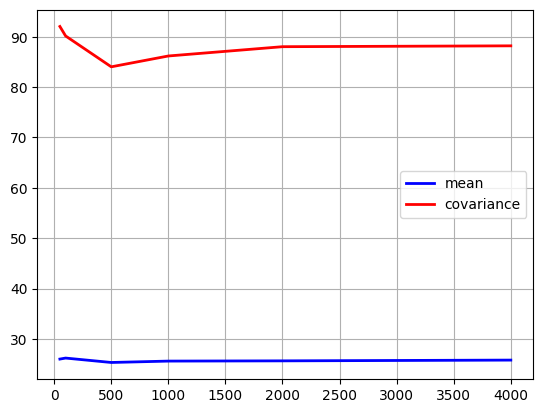

In [6]:
mean_2,covariance_2 = class_conditional(2)
print(mean_2,covariance_2)
plt.plot(x,mean_2 , label='mean', color='b', linestyle='-', linewidth=2)
plt.plot(x,covariance_2 , label='covariance', color='r', linestyle='-', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

50
(3072, 3072)
100
(3072, 3072)
500
(3072, 3072)
1000
(3072, 3072)
2000
(3072, 3072)
4000
(3072, 3072)
[np.float32(25.028383), np.float32(25.00479), np.float32(25.31084), np.float32(25.243448), np.float32(25.048405), np.float32(24.976734)] [np.float64(89.4493237970859), np.float64(81.98103639809216), np.float64(89.55756436939144), np.float64(87.98673068419012), np.float64(88.26702847108615), np.float64(88.5505290320037)]


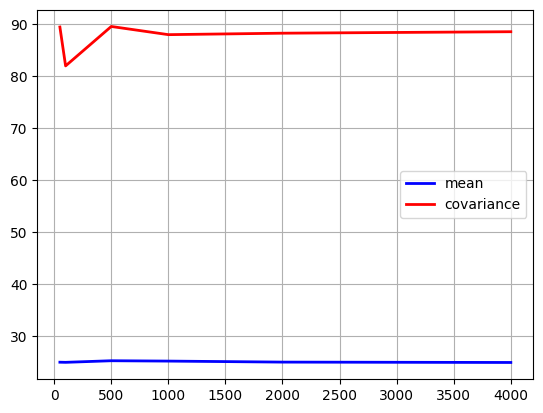

In [7]:
mean_3,covariance_3 = class_conditional(3)
print(mean_3,covariance_3)
plt.plot(x,mean_3 , label='mean', color='b', linestyle='-', linewidth=2)
plt.plot(x,covariance_3 , label='covariance', color='r', linestyle='-', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import random
all_vec_0 = []
all_vec_1 = []
all_vec_2 = []
all_vec_3 = []
for i in range(len(train_img)):
        if train_labels[i] == 0:
            data_vec = []
            for j in [0,1,2]:
                for k in range(32):
                    for l in range(32):
                        data_vec.append(train_img[i][j][k][l])
            data_vec = np.array(data_vec)
            all_vec_0.append(data_vec)
for i in range(len(train_img)):
        if train_labels[i] == 1:
            data_vec = []
            for j in [0,1,2]:
                for k in range(32):
                    for l in range(32):
                        data_vec.append(train_img[i][j][k][l])
            data_vec = np.array(data_vec)
            all_vec_1.append(data_vec)
for i in range(len(train_img)):
        if train_labels[i] == 2:
            data_vec = []
            for j in [0,1,2]:
                for k in range(32):
                    for l in range(32):
                        data_vec.append(train_img[i][j][k][l])
            data_vec = np.array(data_vec)
            all_vec_2.append(data_vec)
for i in range(len(train_img)):
        if train_labels[i] == 3:
            data_vec = []
            for j in [0,1,2]:
                for k in range(32):
                    for l in range(32):
                        data_vec.append(train_img[i][j][k][l])
            data_vec = np.array(data_vec)
            all_vec_3.append(data_vec)
all_vec_0 = np.array(all_vec_0)
all_vec_1 = np.array(all_vec_1)
all_vec_2 = np.array(all_vec_2)
all_vec_3 = np.array(all_vec_3)
all_vec = [all_vec_0,all_vec_1,all_vec_2,all_vec_3]



In [9]:
def random_sampling(n,class_num):
    random_sample = []
    random_list = random.sample([i for i in range(5000)],n)
    for i in random_list:
        random_sample.append(all_vec[class_num][i])
    random_sample = np.array(random_sample)
    return random_sample

print(len(random_sampling(500,0)))

500


In [ ]:
import numpy as np 

def mean_covariance(data):
    """Compute mean and covariance matrix for a given class data."""
    mean = np.mean(data, axis=0)
    covariance = np.cov(data, rowvar=False)
    return mean, covariance

def fisher_multiclass(n):
    """
    Implements Fisher's Linear Discriminant (FLD) for a 4-class classification problem.

    Parameters:
        n (int): Number of random samples per class.

    Returns:
        eigen_values (np.array): Top eigenvalues for Fisher projection.
        eigen_vectors (np.array): Corresponding eigenvectors.
        projected_data (dict): Dictionary containing projected data for each class.
    """
    objective_value_list = []
    # Get random samples for each class
    for iter in range(20):
        random_sample_0 = random_sampling(n, 0)
        random_sample_1 = random_sampling(n, 1)
        random_sample_2 = random_sampling(n, 2)
        random_sample_3 = random_sampling(n, 3)

        # Compute mean and covariance for each class
        mean_0, covariance_0 = mean_covariance(random_sample_0)
        mean_1, covariance_1 = mean_covariance(random_sample_1)
        mean_2, covariance_2 = mean_covariance(random_sample_2)
        mean_3, covariance_3 = mean_covariance(random_sample_3)

        means = [mean_0, mean_1, mean_2, mean_3]
        covariances = [covariance_0, covariance_1, covariance_2, covariance_3]

        num_classes = 4  # Number of classes
        num_features = random_sample_0.shape[1]  # Feature dimension (3072 for 32x32x3 images)

        # Compute Within-Class Scatter Matrix S_W
        S_W = np.zeros((num_features, num_features))
        for cov in covariances:
            S_W += cov

        # Compute Between-Class Scatter Matrix S_B
        overall_mean = np.mean(means, axis=0)  # Mean across all classes
        S_B = np.zeros((num_features, num_features))
        
        for i in range(num_classes):
            mean_diff = (means[i] - overall_mean).reshape(num_features, 1)
            S_B += n * np.dot(mean_diff, mean_diff.T)

        # Solve Generalized Eigenvalue Problem S_W⁻¹ S_B
        eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.pinv(S_W), S_B))  # Use pinv for stability
        
        # Ensure real values
        eigen_values = np.real(eigen_values)
        eigen_vectors = np.real(eigen_vectors)

        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx]
        #print(eigen_values[:9])
        # Select Top 3 Eigenvectors for Fisher Projection
        eigen_values = eigen_values[:3]
        eigen_vectors = eigen_vectors[:, :3]
        objective_value_list.append(sum(list(eigen_values)))
    
    

    return objective_value_list


# Example Usage
# eigen_values, eigen_vectors,  = fisher_multiclass(2500)

# # Print Results
# print("Top 3 Eigenvalues:", eigen_values)
# print("Top 3 Eigenvectors Shape:", eigen_vectors.shape)

# Print Projection Shapes


In [11]:
def classifier_var(n,test):
    random_sample_0 = random_sampling(n, 0)
    random_sample_1 = random_sampling(n, 1)
    random_sample_2 = random_sampling(n, 2)
    random_sample_3 = random_sampling(n, 3)

    # Compute mean and covariance for each class
    mean_0, covariance_0 = mean_covariance(random_sample_0)
    mean_1, covariance_1 = mean_covariance(random_sample_1)
    mean_2, covariance_2 = mean_covariance(random_sample_2)
    mean_3, covariance_3 = mean_covariance(random_sample_3)

    means = [mean_0, mean_1, mean_2, mean_3]
    covariances = [covariance_0, covariance_1, covariance_2, covariance_3]

    num_classes = 4  # Number of classes
    num_features = random_sample_0.shape[1]  # Feature dimension (3072 for 32x32x3 images)

    # Compute Within-Class Scatter Matrix S_W
    S_W = np.zeros((num_features, num_features))
    for cov in covariances:
        S_W += cov

    # Compute Between-Class Scatter Matrix S_B
    overall_mean = np.mean(means, axis=0)  # Mean across all classes
    S_B = np.zeros((num_features, num_features))
    
    for i in range(num_classes):
        mean_diff = (means[i] - overall_mean).reshape(num_features, 1)
        S_B += n * np.dot(mean_diff, mean_diff.T)

    # Solve Generalized Eigenvalue Problem S_W⁻¹ S_B
    eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.pinv(S_W), S_B))  # Use pinv for stability
    
    # Ensure real values
    eigen_values = np.real(eigen_values)
    eigen_vectors = np.real(eigen_vectors)

    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    #print(eigen_values[:9])
    # Select Top 3 Eigenvectors for Fisher Projection
    eigen_values = eigen_values[:3]
    eigen_vectors = eigen_vectors[:, :3]

    projected_mean = []
    projected_covariance = []
    for i in range(4):
        projected_mean.append(np.dot(means[i], eigen_vectors))
        projected_covariance.append(np.dot(np.dot(eigen_vectors.T, covariances[i]), eigen_vectors))
    accuracy = 0
    test_data =[]
    for i in range(len(test_img)):
        data_vec = []
        for j in [0,1,2]:
            for k in range(32):
                for l in range(32):
                    data_vec.append(test[i][j][k][l])
        data_vec = np.array(data_vec)
        test_data.append(data_vec)
    for i in range(len(test_data)):
        projected_data = np.dot(test_data[i], eigen_vectors)
        p_1 = np.exp(-0.5 * np.dot(np.dot((projected_data - projected_mean[0]), np.linalg.inv(projected_covariance[0])), (projected_data - projected_mean[0]).T))
        p_2 = np.exp(-0.5 * np.dot(np.dot((projected_data - projected_mean[1]), np.linalg.inv(projected_covariance[1])), (projected_data - projected_mean[1]).T))
        p_3 = np.exp(-0.5 * np.dot(np.dot((projected_data - projected_mean[2]), np.linalg.inv(projected_covariance[2])), (projected_data - projected_mean[2]).T))
        p_4 = np.exp(-0.5 * np.dot(np.dot((projected_data - projected_mean[3]), np.linalg.inv(projected_covariance[3])), (projected_data - projected_mean[3]).T))
        p = [p_1, p_2, p_3, p_4]
        if np.argmax(p) == test_labels[i]:
            accuracy += 1
    return accuracy/len(test_data)

In [12]:
n = [2500,3500,4500,5000]
accuracy = []
for i in n:
    accuracy.append(classifier_var(i,test_img))
print(accuracy)

[0.517, 0.537, 0.548, 0.558]


ValueError: x and y must have same first dimension, but have shapes (4,) and (6,)

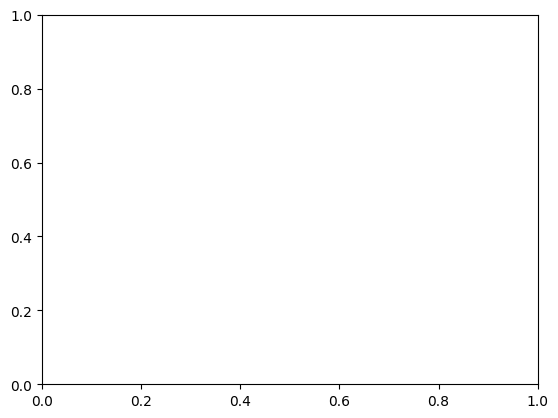

In [14]:
import matplotlib.pyplot as plt
x = [2500,3500,4500,5000]
accuracy.append(0.636)
plt.plot(x,accuracy , label='accuracy', color='b', linestyle='-', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Different values of n
n_values = [2500, 3500, 4000, 4500, 5000]
objective_values = {}

# Compute objective values for each n
for n in n_values:
    objective_values[n] = fisher_multiclass(n)

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([objective_values[n] for n in n_values], labels=n_values)

# Formatting
plt.xlabel("Number of Samples (n)")
plt.ylabel("Objective Function Value")
plt.title("Box Plot of Objective Values for Different n in Fisher’s Discriminant")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


KeyboardInterrupt: 

: 

In [ ]:

mean_0, covariance_0 = mean_covariance_estimate(5000, 0)
mean_1, covariance_1 = mean_covariance_estimate(5000, 1)
mean_2, covariance_2 = mean_covariance_estimate(5000, 2)
mean_3, covariance_3 = mean_covariance_estimate(5000, 3)

means = [mean_0, mean_1, mean_2, mean_3]
covariances = [covariance_0, covariance_1, covariance_2, covariance_3]

num_classes = 4  # Number of classes
num_features = 3072 # Feature dimension (3072 for 32x32x3 images)

# Compute Within-Class Scatter Matrix S_W
S_W = np.zeros((num_features, num_features))
for cov in covariances:
    S_W += cov

# Compute Between-Class Scatter Matrix S_B
overall_mean = np.mean(means, axis=0)  # Mean across all classes
S_B = np.zeros((num_features, num_features))
print("n :",n)
for i in range(num_classes):
    mean_diff = (means[i] - overall_mean).reshape(num_features, 1)
    S_B += n * np.dot(mean_diff, mean_diff.T)

# Solve Generalized Eigenvalue Problem S_W⁻¹ S_B
eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.pinv(S_W), S_B))  # Use pinv for stability

# Ensure real values
eigen_values = np.real(eigen_values)
eigen_vectors = np.real(eigen_vectors)

# Sort eigenvectors by eigenvalues in descending order
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]
#print(eigen_values[:9])
# Select Top 3 Eigenvectors for Fisher Projection
eigen_values = eigen_values[:3]
eigen_vectors = eigen_vectors[:, :3]


projections = []
projections_0 = []
projections_1 = []
projections_2 = []
projections_3 = []
for i in range(len(all_vec[0])):
    projection = np.dot(all_vec[0][i],eigen_vectors)
    projections_0.append(projection)
for i in range(len(all_vec[1])):
    projection = np.dot(all_vec[1][i],eigen_vectors)
    projections_1.append(projection)
for i in range(len(all_vec[2])):
    projection = np.dot(all_vec[2][i],eigen_vectors)
    projections_2.append(projection)
for i in range(len(all_vec[3])):
    projection = np.dot(all_vec[3][i],eigen_vectors)
    projections_3.append(projection)
projections_0 = np.array(projections_0)
projections_1 = np.array(projections_1)
projections_2 = np.array(projections_2)
projections_3 = np.array(projections_3)

projections = [projections_0, projections_1, projections_2, projections_3]





5000
5000
5000
5000
n : [2500, 3500, 4500, 5000]


ValueError: operands could not be broadcast together with shapes (4,) (3072,3072) 

: 

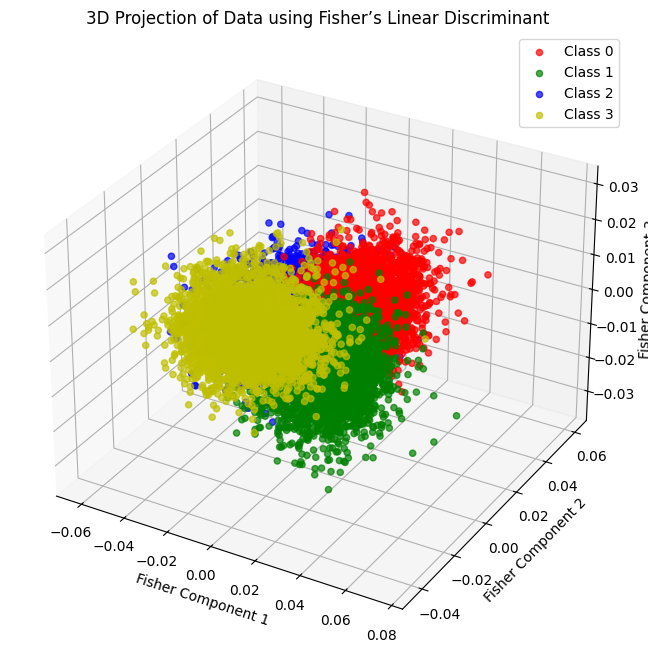

In [ ]:
colors = ['r', 'g', 'b', 'y']
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Create 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each class in 3D space
for i, proj in enumerate(projections):
    ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c=colors[i], label=labels[i], alpha=0.7)

# Labels and legend
ax.set_xlabel("Fisher Component 1")
ax.set_ylabel("Fisher Component 2")
ax.set_zlabel("Fisher Component 3")
ax.set_title("3D Projection of Data using Fisher’s Linear Discriminant")
ax.legend()

# Show plot
plt.show()

In [ ]:
def classifier(test_data):
    mean_0,covariance_0 = mean_covariance(projections_0)
    mean_1,covariance_1 = mean_covariance(projections_1)
    mean_2,covariance_2 = mean_covariance(projections_2)
    mean_3,covariance_3 = mean_covariance(projections_3)

    prob_0 = np.exp(-0.5*np.dot(np.dot((test_data-mean_0),np.linalg.inv(covariance_0)),(test_data-mean_0).T))/(np.sqrt(np.linalg.det(covariance_0)))
    prob_1 = np.exp(-0.5*np.dot(np.dot((test_data-mean_1),np.linalg.inv(covariance_1)),(test_data-mean_1).T))/(np.sqrt(np.linalg.det(covariance_1)))
    prob_2 = np.exp(-0.5*np.dot(np.dot((test_data-mean_2),np.linalg.inv(covariance_2)),(test_data-mean_2).T))/(np.sqrt(np.linalg.det(covariance_2)))
    prob_3 = np.exp(-0.5*np.dot(np.dot((test_data-mean_3),np.linalg.inv(covariance_3)),(test_data-mean_3).T))/(np.sqrt(np.linalg.det(covariance_3)))

    probs = [prob_0,prob_1,prob_2,prob_3]
    return np.argmax(probs)



In [ ]:
accuracy = 0
test_data =[]
for i in range(len(test_img)):
    data_vec = []
    for j in [0,1,2]:
        for k in range(32):
            for l in range(32):
                data_vec.append(test_img[i][j][k][l])
    data_vec = np.array(data_vec)
    test_data.append(data_vec)
    projection = np.dot(test_data[i],eigen_vectors)
    prediction = classifier(projection)
    #print(prediction)
    if prediction == test_labels[i]:
        accuracy += 1
print(accuracy/len(test_img))

    

0.636
